In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install sns
!pip3 install heatmapz


  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2662 sha256=ee9a48e04277279195c85ef600a30853df6cbb9a8cba37dc6f3cd87be43ddcb3
  Stored in directory: /root/.cache/pip/wheels/cc/26/02/785cf1aeaa8d9e565796a1b962467bcdf62172c8fe12096ffb
Successfully built sns


In [ ]:
# Install Keras Tuner
!pip3 install keras-tuner --upgrade

In [1]:
from google.colab import drive, files # google colab specific
import requests
import pandas as pd
import os
import warnings
import sys
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from keras import layers
import math
from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime as dt
from pylab import rcParams
#import keras_tuner as kt

import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
from heatmap import heatmap, corrplot
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: ignored

In [ ]:
# Read in all Fundamental Data and Store it in one big dataframe for easier use
#df1 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/FedFundsRate.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Global Price Index of All Commodities.csv')
#df3 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/InflationRate 20y.csv')
#df4 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/All Employees Construction in Florida.csv')
#df5 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Homeownership Rate.csv')
#df6 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Housing Inventory Estimate Vacant Housing Units.csv')
#df7 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/MonthlySupplyHousesUSA.csv')
#df8 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/New Housing Units Completed Total Units.csv')
#df9 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/New Housing Units Under Construction Total Units.csv')
#df10 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Rental Vacancy Rate.csv')
#df11 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/State Tax Collections Total Taxes for Florida.csv')
#df12 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/Total Shipments of New Manufactured Homes Total Homes.csv')
#df13 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/UnemploymentRate.csv')
#df14 = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/FundamentalDataModified/ShillerIndex.csv')


In [ ]:
# Modify CSV files to fit each other
#filePath = "/content/drive/MyDrive/JPM/jphomevalue/data/TPXRSA.csv"
#df = pd.read_csv(filePath, header = 0)
#df['DATE'] = pd.to_datetime(df['DATE'])
#df = df.set_index('DATE')
#df.index = df.index.to_period("1M")
#df = df.resample('1M').interpolate()
#df = df.rename(columns={"TPXRSA": "ShillerIndex"})
#df

In [ ]:
# Download the new modified file 
#df.to_csv('RealEstateFundamentalData.csv')
#files.download('RealEstateFundamentalData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Join all datasets together
#df = df1.set_index('DATE').join(df2.set_index('DATE'), on='DATE').join(df3.set_index('DATE'), on='DATE').join(df4.set_index('DATE'), on='DATE').join(df5.set_index('DATE'), on='DATE').join(df6.set_index('DATE'), on='DATE').join(df7.set_index('DATE'), on='DATE').join(df8.set_index('DATE'), on='DATE').join(df9.set_index('DATE'), on='DATE').join(df10.set_index('DATE'), on='DATE').join(df11.set_index('DATE'), on='DATE').join(df12.set_index('DATE'), on='DATE').join(df13.set_index('DATE'), on='DATE').join(df14.set_index('DATE'), on='DATE')

In [ ]:
# Read in the csv file that contains the time series data of the Shiller Index
# Create the dataframe

df = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/RealEstateFundamentalData2003-.csv')
df.head()

,DATE,FedRate,CommoditiesGlobalPrice,AllEmployeesConstructionFL,HomeownershipRate,VacantHousingInventory,MonthlyHouseSupply,NewCompletedHousing,NewUnderConstrHousing,RentalVacancyRate,Taxes,ManufacturedHomesShipments,UnemploymentRate,ShillerIndex
0,2003-01,1.24,67.170823,514.7,68.000000,14908.00000,4.0,1654,1049,9.400000,6744.000000,141,5.8,133.271389
1,2003-02,1.26,65.812391,515.8,68.000000,15020.00000,4.5,1688,1044,9.466667,6966.333333,138,5.9,134.661896
2,2003-03,1.25,64.453960,516.2,68.000000,15132.00000,4.1,1638,1044,9.533333,7188.666667,128,5.9,135.520305
3,2003-04,1.26,63.095529,517.0,68.000000,15244.00000,4.1,1662,1043,9.600000,7411.000000,131,6.0,136.626738
4,2003-05,1.26,63.421556,519.2,68.133333,15367.33333,3.9,1733,1047,9.700000,7359.000000,130,6.1,138.117430


In [ ]:
df.shape

(226, 14)

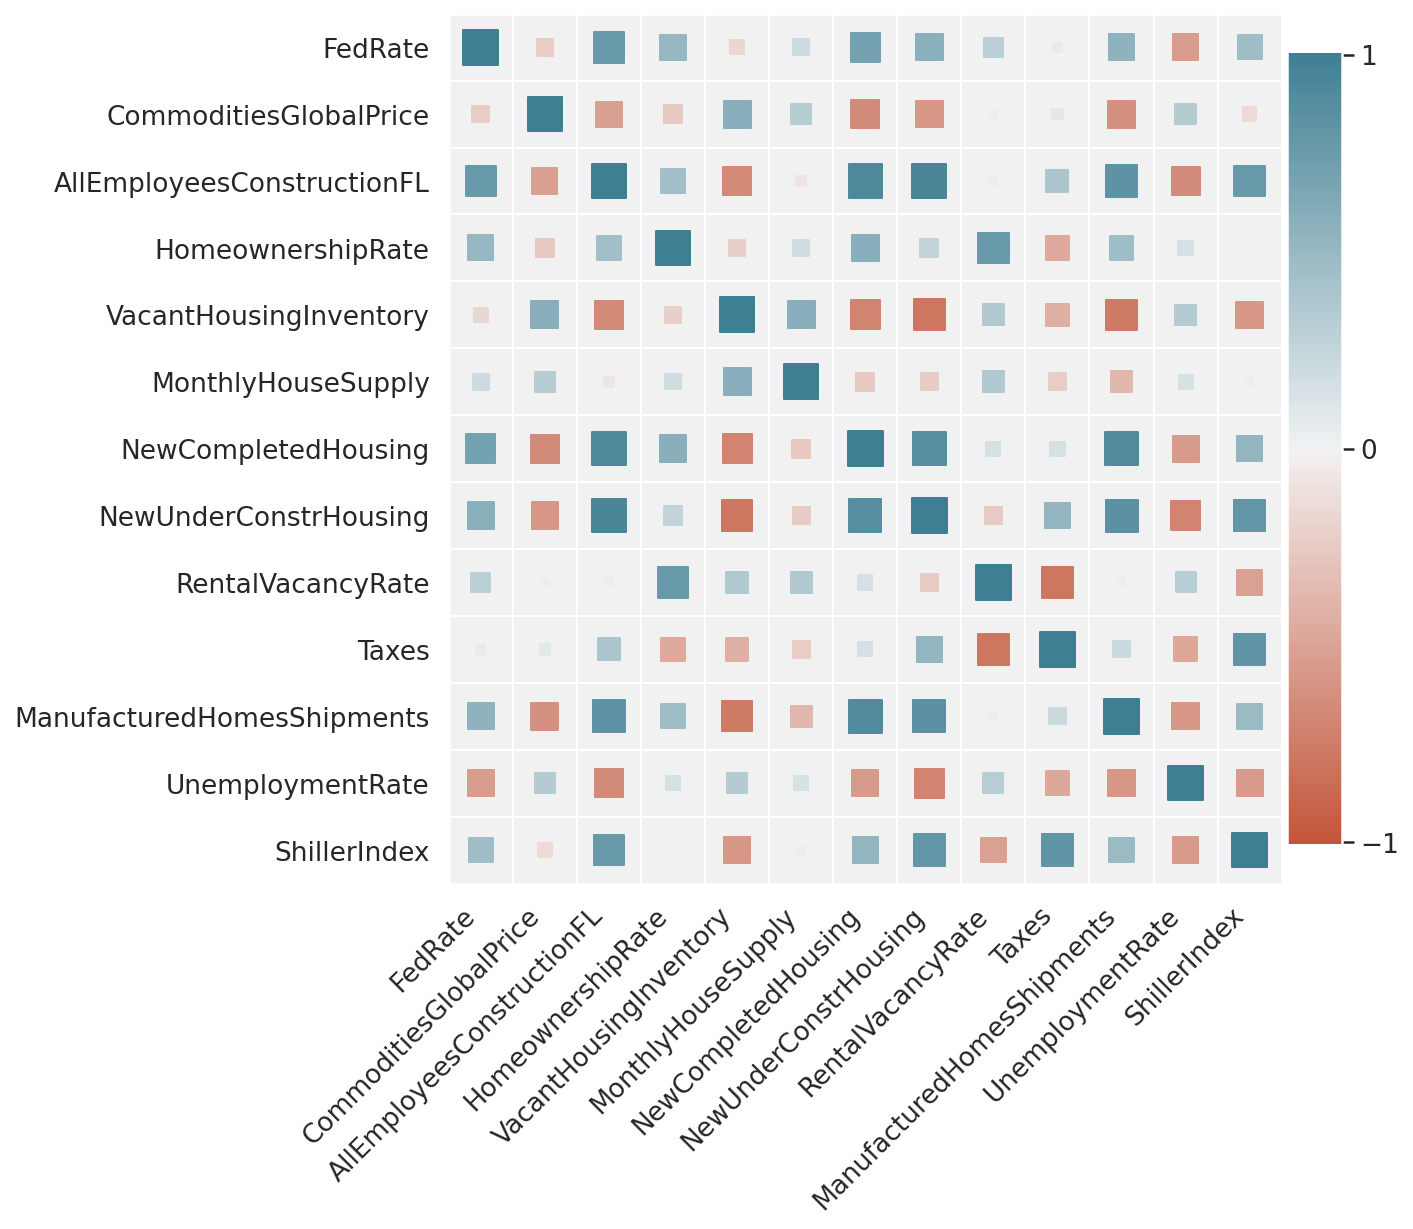

In [ ]:
# Feature Engineering

plt.figure(figsize=(8, 8))
corrplot(df.corr(method='pearson'), size_scale=300);

In [ ]:
# Numerical Correlations 

correlations = df.corr()
print(correlations)

In [ ]:
correlations

,FedRate,CommoditiesGlobalPrice,InflationRate,AllEmployeesConstructionFL,HomeownershipRate,VacantHousingInventory,MonthlyHouseSupply,NewCompletedHousing,NewUnderConstrHousing,RentalVacancyRate,Taxes,ManufacturedHomesShipments,UnemploymentRate,ShillerIndex
FedRate,1.000000,-0.284733,0.444477,0.790951,0.575813,-0.194458,0.203222,0.768763,0.596659,0.332096,0.053323,0.627282,-0.541526,0.481470
CommoditiesGlobalPrice,-0.284733,1.000000,0.364506,-0.548636,-0.090389,0.506444,0.194859,-0.583021,-0.593087,0.130067,-0.149088,-0.511336,0.380736,-0.348915
InflationRate,0.444477,0.364506,1.000000,0.189379,0.561581,0.042452,-0.034330,0.331238,0.058563,0.524261,-0.148277,0.291970,-0.004806,-0.006594
AllEmployeesConstructionFL,0.790951,-0.548636,0.189379,1.000000,0.435540,-0.678944,-0.038974,0.942432,0.952068,-0.082327,0.482038,0.870863,-0.654514,0.846483
HomeownershipRate,0.575813,-0.090389,0.561581,0.435540,1.000000,-0.092043,0.350977,0.524284,0.224910,0.751257,-0.373550,0.380350,0.189780,0.097222
VacantHousingInventory,-0.194458,0.506444,0.042452,-0.678944,-0.092043,1.000000,0.547162,-0.657713,-0.799296,0.533363,-0.669284,-0.713300,0.354698,-0.762445
MonthlyHouseSupply,0.203222,0.194859,-0.034330,-0.038974,0.350977,0.547162,1.000000,-0.158316,-0.196189,0.513008,-0.407861,-0.274943,0.146693,-0.138998
NewCompletedHousing,0.768763,-0.583021,0.331238,0.942432,0.524284,-0.657713,-0.158316,1.000000,0.893342,0.061586,0.345185,0.899774,-0.583521,0.703797
NewUnderConstrHousing,0.596659,-0.593087,0.058563,0.952068,0.224910,-0.799296,-0.196189,0.893342,1.000000,-0.316438,0.641282,0.875971,-0.699708,0.898427
RentalVacancyRate,0.332096,0.130067,0.524261,-0.082327,0.751257,0.533363,0.513008,0.061586,-0.316438,1.000000,-0.770760,-0.081794,0.353668,-0.469677


In [ ]:
### By applying Feature Engineering, and calculating the correlation scores we can deduce that Inflation Rate, HomeownershipRate and MonthlyHouseSupply have low correlation to the ShillerIndex.
### Therefore those features will not be used to train the model.

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/JPM/jphomevalue/data/RealEstateFundamentalData2003-.csv')
new_df = new_df.drop(columns=['CommoditiesGlobalPrice', 'HomeownershipRate', 'MonthlyHouseSupply'])
new_df


,DATE,FedRate,AllEmployeesConstructionFL,VacantHousingInventory,NewCompletedHousing,NewUnderConstrHousing,RentalVacancyRate,Taxes,ManufacturedHomesShipments,UnemploymentRate,ShillerIndex
0,2003-01,1.24,514.7,14908.00000,1654,1049,9.400000,6744.000000,141,5.8,133.271389
1,2003-02,1.26,515.8,15020.00000,1688,1044,9.466667,6966.333333,138,5.9,134.661896
2,2003-03,1.25,516.2,15132.00000,1638,1044,9.533333,7188.666667,128,5.9,135.520305
3,2003-04,1.26,517.0,15244.00000,1662,1043,9.600000,7411.000000,131,6.0,136.626738
4,2003-05,1.26,519.2,15367.33333,1733,1047,9.700000,7359.000000,130,6.1,138.117430
...,...,...,...,...,...,...,...,...,...,...,...
221,2021-06,0.08,573.0,15336.33333,1312,1371,5.933333,14133.000000,106,5.9,281.680957
222,2021-07,0.10,576.7,15185.00000,1380,1384,5.800000,13715.000000,104,5.4,289.633330
223,2021-08,0.09,575.0,15115.00000,1291,1408,5.733333,13863.666670,105,5.2,296.829882
224,2021-09,0.08,576.6,15045.00000,1235,1434,5.666667,14012.333330,106,4.7,304.124715


In [ ]:
# Select Features
features = list(new_df)[1:12]

# Extract dates (For vizualization purposes)
datelist_total = list(new_df['DATE'])
datelist_total = [dt.datetime.strptime(date, '%Y-%m').date() for date in datelist_total]
print('Available Data == {}'.format(new_df.shape))
print('All timestamps == {}'.format(len(datelist_total)))
print('Features: {}'.format(features))

Available Data == (226, 11)
All timestamps == 226
Features: ['FedRate', 'AllEmployeesConstructionFL', 'VacantHousingInventory', 'NewCompletedHousing', 'NewUnderConstrHousing', 'RentalVacancyRate', 'Taxes', 'ManufacturedHomesShipments', 'UnemploymentRate', 'ShillerIndex']


In [ ]:
# Data Pre-Processing (CSV to NUMPY array)

new_df = new_df[features].astype(str)
for i in features:
    for j in range(0, len(new_df)):
        new_df[i][j] = new_df[i][j].replace(',', '')

new_df = new_df.astype(float)

# Using multiple features (predictors)
training_set = new_df.to_numpy()

print('Shape of Data == {}.'.format(training_set.shape))
training_set



Shape of Data == (226, 10).


array([[1.24000000e+00, 5.14700000e+02, 1.49080000e+04, ...,
        1.41000000e+02, 5.80000000e+00, 1.33271389e+02],
       [1.26000000e+00, 5.15800000e+02, 1.50200000e+04, ...,
        1.38000000e+02, 5.90000000e+00, 1.34661896e+02],
       [1.25000000e+00, 5.16200000e+02, 1.51320000e+04, ...,
        1.28000000e+02, 5.90000000e+00, 1.35520305e+02],
       ...,
       [9.00000000e-02, 5.75000000e+02, 1.51150000e+04, ...,
        1.05000000e+02, 5.20000000e+00, 2.96829882e+02],
       [8.00000000e-02, 5.76600000e+02, 1.50450000e+04, ...,
        1.06000000e+02, 4.70000000e+00, 3.04124715e+02],
       [8.00000000e-02, 5.77300000e+02, 1.49750000e+04, ...,
        1.07000000e+02, 4.60000000e+00, 3.09713391e+02]])

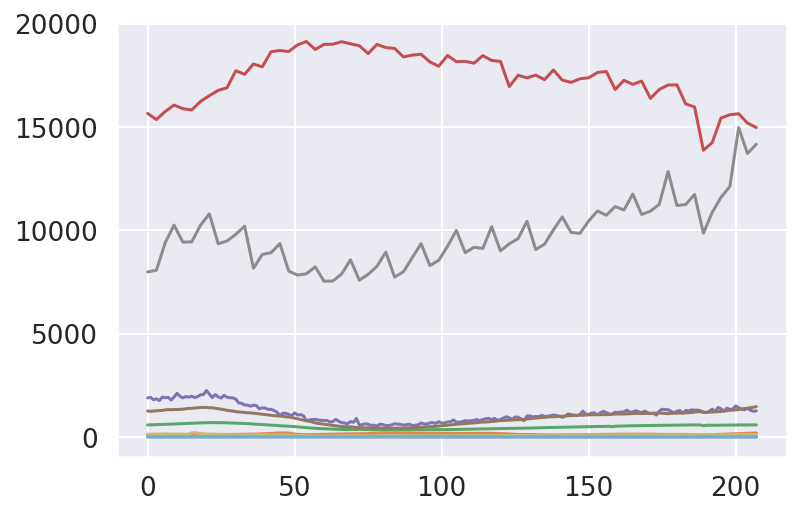

In [ ]:
# Visualize the data for reference. 
plt.plot(new_df)

In [ ]:
training_set[:,9:10]

In [ ]:
#### NORMALIZATION #####
# Normalize the data with the range 0 - 1
scaler = MinMaxScaler(feature_range=(0,1))

# Apply the scaler to the dataframe
#df = scaler.fit_transform(np.array(df).reshape(-1,1))
training_set_X = scaler.fit_transform(training_set)
std_data = scaler.fit_transform(training_set)
scaler_pred = MinMaxScaler(feature_range=(0,1))
training_set_Y = scaler_pred.fit_transform(training_set[:,9:10])
# Print df1 to check the change
#print(df1)

#### STANDARDIZATION ####

# Standardization for Training Set
#scaler2 = StandardScaler()
#training_set_X = scaler2.fit_transform(training_set)
#std_data = scaler2.fit_transform(training_set)
# Standardization for Predicted Values#
#scaler_pred = StandardScaler()
#training_set_Y = scaler_pred.fit_transform(training_set[:,13:14])


In [ ]:
# Verify that standardization has been applied correctly by checking that mean is 0 and std is 1.
new_sequence = training_set_X[:,10].flatten()
new_sequence = new_sequence[new_sequence != 0] #ignore 0s
new_mean = new_sequence.mean()
new_std = new_sequence.std()
print("New mean is:", new_mean)
print("new_std is:", new_std)

New mean is: 0.32404193673978876
new_std is: 0.22284647895431864


In [ ]:
#print(scaler2.inverse_transform(training_set_X))
#df.shape
#training_set_Y
training_set_Y


In [ ]:
# Create matrix
def create_matrix(data_set):
    data_X, data_Y = [], []
    time_step = 17
    dataset = data_set

    for i in range(len(dataset)-time_step-1):
      k = dataset[i:(i + time_step), 0:new_df.shape[1] - 1]
      data_X.append(k)
      data_Y.append(dataset[i + time_step-1:i+time_step, 9])

    data_X, data_Y = np.array(data_X), np.array(data_Y)

    return data_X, data_Y

In [ ]:
# Split the data in training, validation and test set. 
data_split = {'train': 0.7, 'valid': 0.15, 'test': 0.15}
data_partition = {
      'train': std_data[0:int(data_split['train']*std_data.shape[0])],
      'val': std_data[int(data_split['train']*std_data.shape[0]):int((1 - data_split['test'])*std_data.shape[0])],
      'test': std_data[int((1 - data_split['test'])*std_data.shape[0]):int(std_data.shape[0])]
}

train_data = data_partition['train']
val_data = data_partition['val']
test_data = data_partition['test']

pred_data = std_data[int(data_split['train']*std_data.shape[0]):int(std_data.shape[0])]

x_train, y_train = create_matrix(train_data)
x_val, y_val = create_matrix(val_data)
x_test, y_test = create_matrix(test_data)
x_pred, y_pred = create_matrix(pred_data)
test_data.shape

(34, 10)

In [ ]:
training_set_Y

In [ ]:
print('X Train set shape:', x_train.shape)
print('y Train set shape:', y_train.shape)

print('X Validation set shape:', x_val.shape)
print('y Validation set shape:', y_val.shape)

print('X Test set shape:', x_test.shape)
print('y Test set shape:', y_test.shape)

print('X Pred set shape:', x_pred.shape)
print('y Pred set shape:', y_pred.shape)

X Train set shape: (140, 17, 9)
y Train set shape: (140, 1)
X Validation set shape: (16, 17, 9)
y Validation set shape: (16, 1)
X Test set shape: (16, 17, 9)
y Test set shape: (16, 1)
X Pred set shape: (50, 17, 9)
y Pred set shape: (50, 1)


In [ ]:
# ************ KERAS TUNER ************************
# Utilize Keras Tuner to automatically perform model training with different hyperparameters and determine the best model
rmse = tf.keras.metrics.RootMeanSquaredError()
def build_model(hp):
  model = keras.models.Sequential([
  keras.Input(shape=(17, 9)),
  # 4 LSTM Layers 
  keras.layers.LSTM(hp.Choice('units', [100, 150, 200, 250, 300]), return_sequences=True),
  keras.layers.LSTM(hp.Choice('units', [100, 150, 200, 250, 300]), return_sequences=True),
  keras.layers.LSTM(hp.Choice('units', [100, 150, 200, 250, 300]), return_sequences=True),
  keras.layers.LSTM(hp.Choice('units', [100, 150, 200, 250, 300])),
  keras.layers.Dropout(hp.Choice('rate', [0.5, 0.6, 0.7])),
  # Fully Connected Layer
  keras.layers.Dense(hp.Choice('units', [8, 16, 32, 64]), activation = 'relu'),
  keras.layers.Dense(units=1)
  ])
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 5e-3, 1e-4])
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate), loss='mse', metrics = rmse)
  return model
  


In [ ]:
# ***** TUNER ******
tuner = kt.RandomSearch(build_model, objective = 'val_loss', max_trials = 100)
#callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose=1), 
 #           ModelCheckpoint(filepath='/content/sample_data/lstm-model-fundamental-17-14-16.h5', verbose=1, monitor='val_loss', save_best_only=True, save_weights_only=False)]
callbacks = [EarlyStopping(monitor='val_loss', patience = 50)]



In [ ]:
# ***** Call TUNER ***************
tuner.search(x_train, y_train, epochs = 250, validation_data=(x_val, y_val), callbacks = callbacks)

In [ ]:
# Hyperparameters
batch_size = 32
epochs = 500
learning_rate = 0.01

In [3]:
# GRU MODEL ARCHITECTURE

model = keras.models.Sequential([
  keras.Input(shape=(17, 9)),
  # 4 GRU Layers 
  keras.layers.GRU(units=300, return_sequences=True),
  keras.layers.GRU(units=300, return_sequences=True),
  keras.layers.GRU(units=300, return_sequences=True),
  keras.layers.GRU(units=300),
  keras.layers.Dropout(0.5),
  # Fully Connected Layer
  keras.layers.Dense(128),
  keras.layers.Dense(64),
  keras.layers.Dense(8),
  keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 17, 300)           279900    
                                                                 
 gru_5 (GRU)                 (None, 17, 300)           541800    
                                                                 
 gru_6 (GRU)                 (None, 17, 300)           541800    
                                                                 
 gru_7 (GRU)                 (None, 300)               541800    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               38528     
                                                                 
 dense_5 (Dense)             (None, 64)               

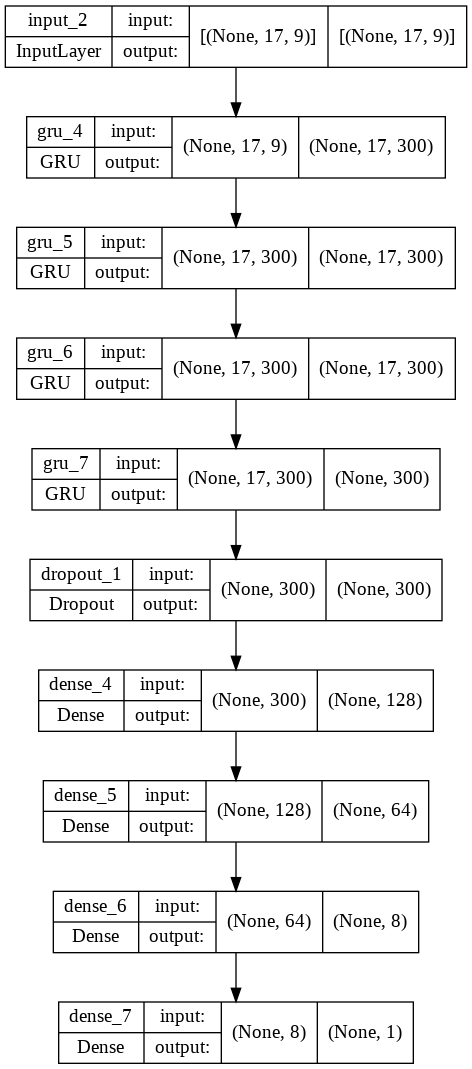

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Loss and Optimizer Functions
mse = tf.keras.losses.MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=mse, optimizer=keras.optimizers.SGD(learning_rate=learning_rate), metrics=[rmse])

In [ ]:
# Callbacks.

callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose=1), 
            ModelCheckpoint(filepath='/content/sample_data/GRU-model-fundamental(LargerDataset)-with-featureEngineering-17-9.h5', verbose=1, monitor='val_loss', save_best_only=True, save_weights_only=False)]

# Train the model
history = model.fit(x=x_train, y=y_train, validation_data =(x_val, y_val), epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=callbacks)


Epoch 1/500
1/5 [=====>........................] - ETA: 27s - loss: 0.0448 - root_mean_squared_error: 0.2117
Epoch 1: val_loss improved from inf to 0.04842, saving model to /content/sample_data/GRU-model-fundamental(LargerDataset)-with-featureEngineering-17-9.h5
5/5 [==============================] - 9s 389ms/step - loss: 0.0298 - root_mean_squared_error: 0.1727 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2200
Epoch 2/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.1377
Epoch 2: val_loss improved from 0.04842 to 0.01563, saving model to /content/sample_data/GRU-model-fundamental(LargerDataset)-with-featureEngineering-17-9.h5
5/5 [==============================] - 0s 28ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250
Epoch 3/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1108
Epoch 3: val_loss did not improve from 0.01563

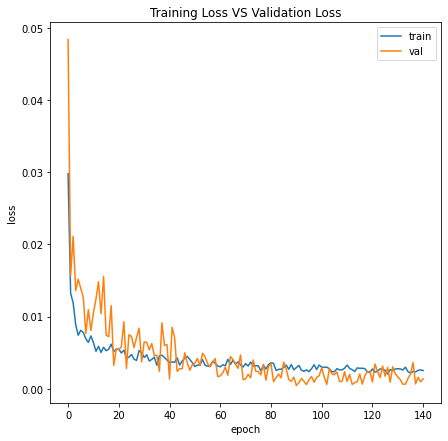

In [ ]:
# Visualize loss

# Visualize training and validation loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss VS Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# Load model
# model = keras.models.load_model('')


In [ ]:
# Generate list of sequence of days for predictions

n_future_step = 12
n_train_step = int(0.7 * 226)
n_val_step = int(0.15 * 226)
n_test_step = int(0.15 * 226)


datelist_train = pd.date_range(datelist_total[17], periods = n_train_step-18, freq='1m').tolist()
datelist_val = pd.date_range(datelist_total[n_train_step+17], periods=n_val_step-17, freq='1m').tolist()
datelist_test =pd.date_range(datelist_total[len(datelist_total)-n_test_step+17], periods=n_test_step-17, freq='1m').tolist()

datelist_future = pd.date_range(datelist_total[-1], periods=n_future_step, freq='1m').tolist()
# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
datelist_train_ = []
datelist_val_ = []
datelist_test_ = []

for this_timestamp in datelist_train:
    datelist_future_.append(this_timestamp.date())
for this_timestamp in datelist_val:
    datelist_train_.append(this_timestamp.date())
for this_timestamp in datelist_test:
    datelist_val_.append(this_timestamp.date())
for this_timestamp in datelist_future:
    datelist_test_.append(this_timestamp.date())


In [ ]:
#PREDICTIONS_TEST_SET['ShillerIndex']
len(datelist_train)
x_train.shape

(133, 17, 13)

In [ ]:
x_train[-12:].shape

(12, 17, 10)

In [ ]:
x_test.shape

(14, 17, 10)

In [ ]:
# Perform predictions
predictions_future = model.predict(x_test[-12:])
train_set_prediction = model.predict(x_train) 
val_set_prediction = model.predict(x_val)
test_set_prediction = model.predict(x_test)

pred_set_prediction = model.predict(x_pred)

In [ ]:
#predictions_future
print(scaler_pred.inverse_transform(test_set_prediction))

In [ ]:
print(scaler_pred.inverse_transform(y_test))

In [ ]:
#print(scaler_pred.inverse_transform(test_set_prediction))
#print(scaler_pred.inverse_transform(y_test))
#print(scaler_pred.inverse_transform(train_set_prediction))
#print(scaler_pred.inverse_transform(y_train))
x_train.shape

(128, 24, 13)

In [ ]:
# Calculate RMSE
print('Test Set RMSE', math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_test),scaler_pred.inverse_transform(test_set_prediction))))
print('Pred Set RMSE', math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_pred),scaler_pred.inverse_transform(pred_set_prediction))))
print('Validation Set RMSE',math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_val),scaler_pred.inverse_transform(val_set_prediction))))
print('Training Set RMSE', math.sqrt(mean_squared_error(scaler_pred.inverse_transform(y_train),scaler_pred.inverse_transform(train_set_prediction))))


In [ ]:
# Parse training set timestamp for better visualization
new_df = pd.DataFrame(new_df, columns=features)
new_df.index = datelist_total
new_df.index = pd.to_datetime(new_df.index)

In [ ]:
# Inversion and Tranformation

def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_train = scaler_pred.inverse_transform(train_set_prediction)
y_pred_valid = scaler_pred.inverse_transform(val_set_prediction)
y_pred_test = scaler_pred.inverse_transform(test_set_prediction)

y_pred_future = scaler_pred.inverse_transform(predictions_future)
#y_pred_train = scaler_pred.inverse_transform(predictions_train)


PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['ShillerIndex']).set_index(pd.Series(datelist_future))
PREDICTIONS_TRAIN_SET = pd.DataFrame(y_pred_train, columns=['ShillerIndex']).set_index(pd.Series(datelist_train))
PREDICTIONS_VAL_SET = pd.DataFrame(y_pred_valid, columns=['ShillerIndex']).set_index(pd.Series(datelist_val))
PREDICTIONS_TEST_SET = pd.DataFrame(y_pred_test, columns=['ShillerIndex']).set_index(pd.Series(datelist_test))


# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTIONS_TRAIN_SET.index = PREDICTIONS_TRAIN_SET.index.to_series().apply(datetime_to_timestamp)
PREDICTIONS_VAL_SET.index = PREDICTIONS_VAL_SET.index.to_series().apply(datetime_to_timestamp)
PREDICTIONS_TEST_SET.index = PREDICTIONS_TEST_SET.index.to_series().apply(datetime_to_timestamp)


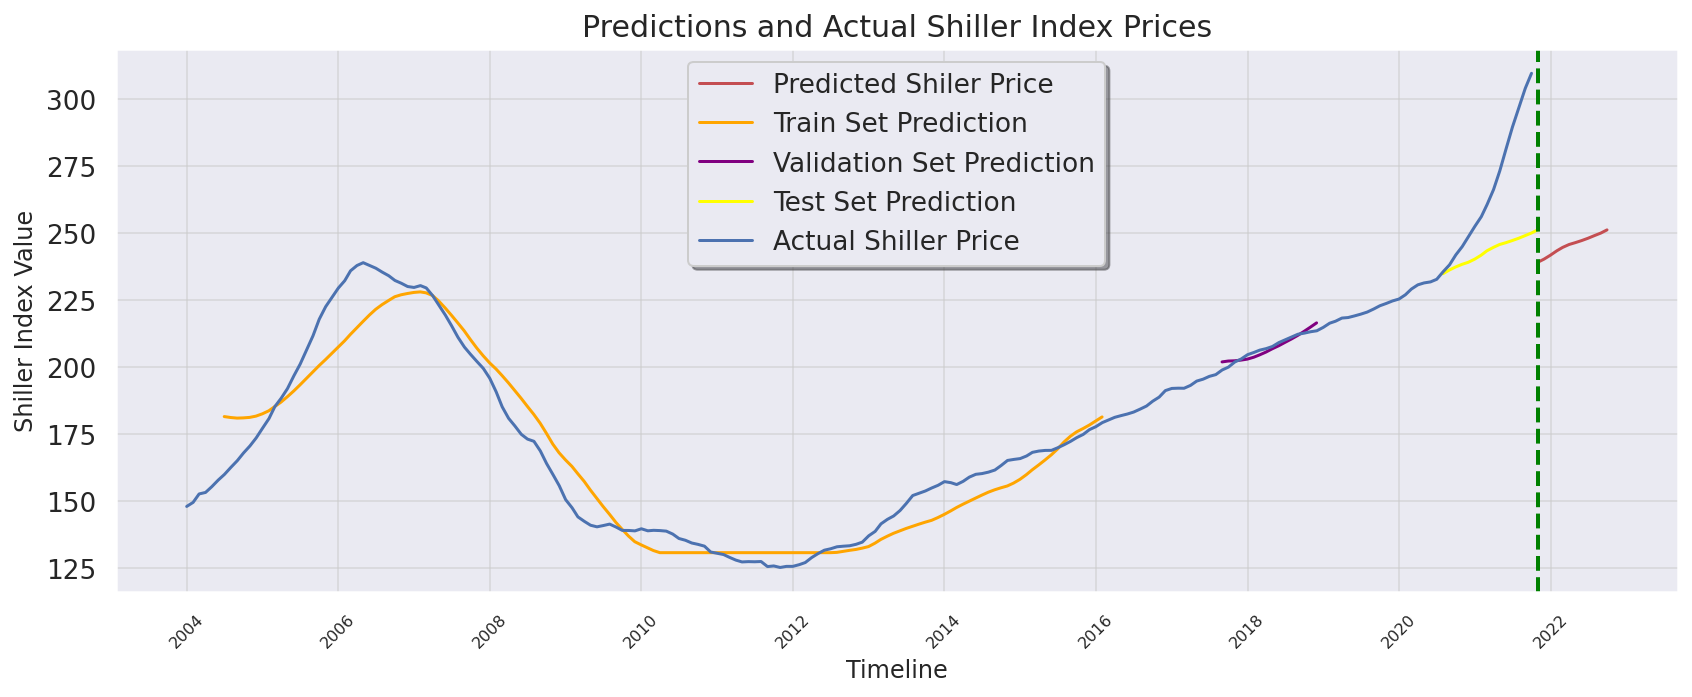

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE = '2004-01'
START_DATE_TRAIN = '2004-07-31'
START_DATE_VAL = '2016-08-31'
START_DATE_TEST = '2018-04-30'
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['ShillerIndex'], color='r', label='Predicted Shiler Price')
plt.plot(PREDICTIONS_TRAIN_SET.index, PREDICTIONS_TRAIN_SET['ShillerIndex'], color='orange', label='Train Set Prediction')
plt.plot(PREDICTIONS_VAL_SET.index, PREDICTIONS_VAL_SET['ShillerIndex'], color='purple', label='Validation Set Prediction')
plt.plot(PREDICTIONS_TEST_SET.index, PREDICTIONS_TEST_SET[START_DATE_TEST:]['ShillerIndex'], color='yellow', label='Test Set Prediction')
plt.plot(new_df.loc[START_DATE:].index, new_df.loc[START_DATE:]['ShillerIndex'], color='b', label='Actual Shiller Price')


plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predictions and Actual Shiller Index Prices', fontsize=15)
plt.xlabel('Timeline',fontsize=12)
plt.ylabel('Shiller Index Value', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [ ]:
# Predicting into the Unknown

pred_input=df1[216:].reshape(1,-1)
print(scaler.inverse_transform(pred_input))

In [ ]:
# Add that to temp input
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()
temp_input 

In [ ]:
from numpy import array

list_output=[]
n_steps=24
i=0
while(i<12):
    
    if(len(temp_input)>24):
        print('Entering main condition')
        #print(temp_input)
        pred_input=np.array(temp_input[1:]) # Shift one to the right
        print("{} month input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape(1, n_steps, 1)
        print('Pred_input shape is:', pred_input.shape)
        fut_pred = model.predict(pred_input, verbose=0)
        print("{} month output {}".format(i,fut_pred))
        temp_input.extend(fut_pred[0].tolist()) # Add that prediction to the temp input list as that will be used in the next prediction 
        temp_input=temp_input[1:] #Shift the temp_input to remove the first element which was already used in a sequence
        #print(temp_input)
        list_output.extend(fut_pred.tolist())
        i=i+1
    else:
        print('Entering else condition')
        pred_input = pred_input.reshape((1, n_steps,1))
        fut_pred = model.predict(pred_input, verbose=0)
        print('The predicted value is:',fut_pred[0])
        temp_input.extend(fut_pred[0].tolist())
        print(len(temp_input))
        list_output.extend(fut_pred.tolist())
        i=i+1
    

print(list_output)